In [18]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime as dt
    

%matplotlib inline  


In [19]:
dtm = lambda x: dt.strptime(str(x), "%d/%m/%Y")

dateparse = lambda dates: pd.datetime.strptime(str(dates), '%d/%m/%Y H:M')
#This helps create Panda time series based on the format of the dates in the file
#%d -> Day of the month as a zero-padded decimal number.
#%m -> Month as a zero-padded decimal number.
#%Y -> Year with century as a decimal number.

In [25]:
df1 = pd.read_csv('EURUSD.csv', header=0, parse_dates='date', index_col='date',date_parser=dtm)
df2 = pd.read_csv('EURGBP.csv', header=0, parse_dates='date', index_col='date',date_parser=dtm)

In [26]:
df = pd.concat([df1, df2],axis=1)
#df = df.fillna(method='pad')

In [27]:
df_rf = np.log ( df.pct_change() + 1.0)
df_rf.drop(df_rf.index[0], inplace=True)

In [28]:
df

,EURUSD,EURGBP
date,,
2000-01-03,0.976250,1.597500
2000-01-04,0.971100,1.588750
2000-01-05,0.968850,1.591450
2000-01-06,0.968200,1.594700
2000-01-07,0.971300,1.592250
2000-01-10,0.975050,1.596700
2000-01-11,0.967450,1.593850
2000-01-12,0.969700,1.596700
2000-01-13,0.974550,1.605100


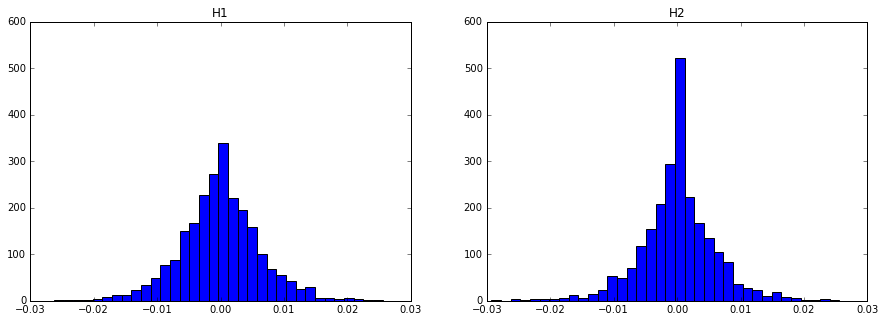

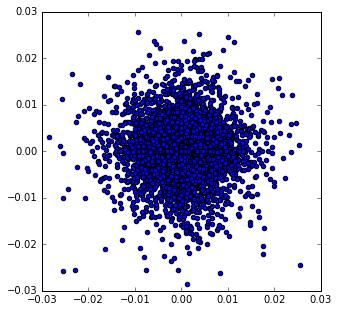

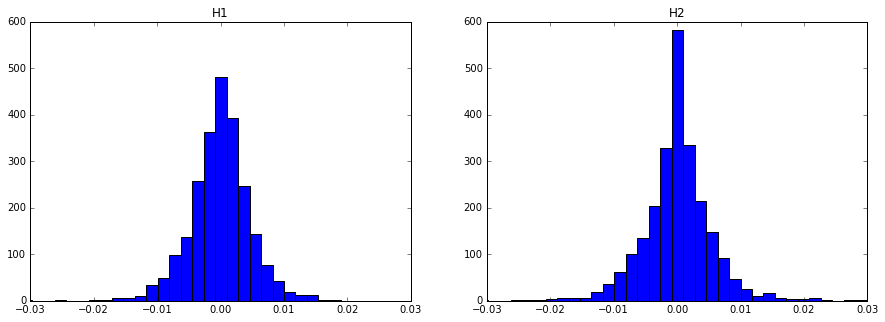

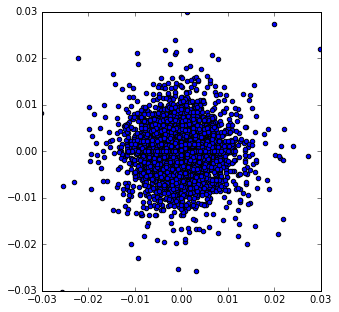

In [35]:

for j in range(0,2):
    title = df_rf.columns[j]
    i = df_rf[title]
    #print(i)
    nLen = len(i)
    h = int(round(nLen/2,0))
    
    #maxV = np.max(i)
    #minV = np.min(i)
    maxV = max(i)
    minV = min(i)
    
    h1 = i[:h]
    h2 = i[h:]
    
    fig, axs = plt.subplots(1,2, figsize=(15, 5))
    
    n, bins, patches = axs[0].hist(h1, bins=40, range=(minV, maxV), label="H1")
    axs[0].set_title("H1")
    axs[0].axis([-0.03,0.03,0,600])
    
    #n, bins, patches = axs[0].hist(h1, bins=20, range=(minV, maxV), label="H1")
    #axs[0].set_title("H1-"+df_rf.columns(ind))
    
    n, bins, patches = axs[1].hist(h2, bins=40, range=(minV, maxV), label="H2")
    axs[1].set_title("H2")
    axs[1].axis([-0.03,0.03,0,600])
    
    #n, bins, patches = axs[1].hist(h2, bins=20, range=(minV, maxV), label="H2")
    #axs[1].set_title("H2-"+df_rf.columns(ind))
            
    plt.show()
    
    x1 = i[:-1]    
    x2 = i[1:]
    plt.figure(figsize=(5,5))
    plt.scatter(x1,x2)
    plt.axis([-0.03,0.03,-0.03,0.03])
    plt.show()
